# Part 1: WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric" ####

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #  print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | al muwayh
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | grand falls-windsor
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | berezovyy
Processing Record 13 of Set 1 | mirny
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | floro
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | diamantina
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | ban tak
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | vilyuchinsk
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.1961,12.1522,23.15,85,78,4.55,AO,1733430882
1,waitangi,-43.9535,-176.5597,12.12,93,100,6.71,NZ,1733430883
2,grytviken,-54.2811,-36.5092,0.46,76,100,2.62,GS,1733430884
3,al muwayh,22.4333,41.7583,20.63,54,59,1.74,SA,1733430885
4,mount gambier,-37.8333,140.7667,17.42,77,100,0.89,AU,1733430836


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,23.15,85,78,4.55,AO,1733430882
1,waitangi,-43.9535,-176.5597,12.12,93,100,6.71,NZ,1733430883
2,grytviken,-54.2811,-36.5092,0.46,76,100,2.62,GS,1733430884
3,al muwayh,22.4333,41.7583,20.63,54,59,1.74,SA,1733430885
4,mount gambier,-37.8333,140.7667,17.42,77,100,0.89,AU,1733430836


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

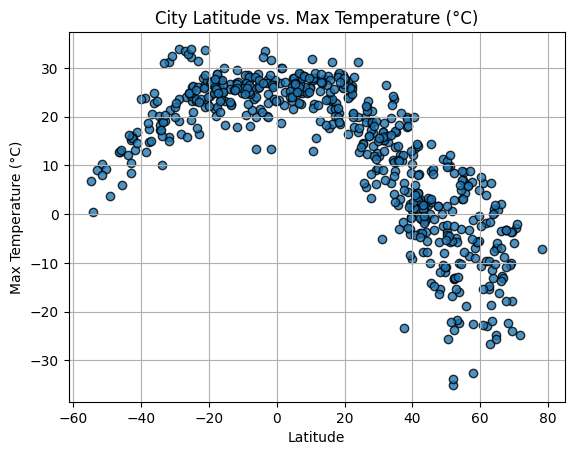

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

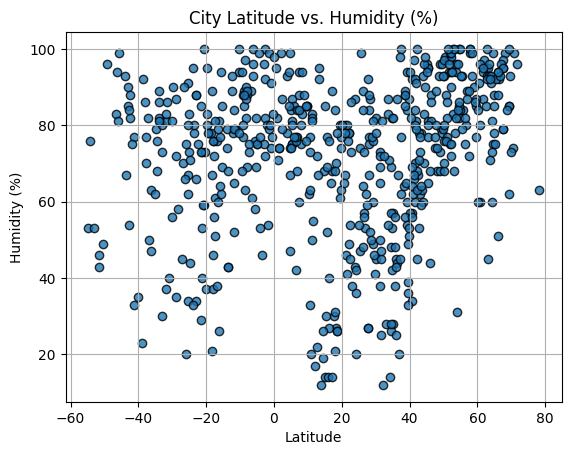

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

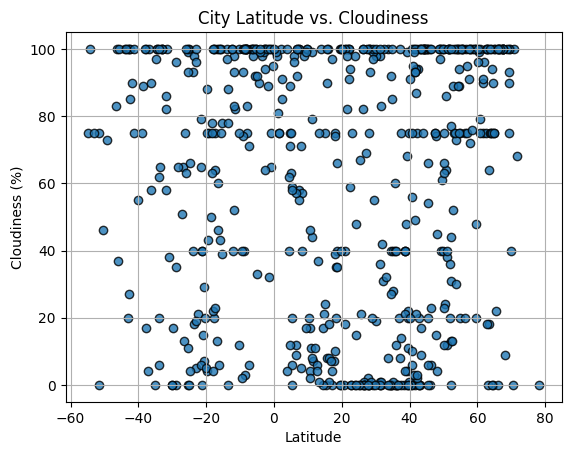

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Cloudiness"], 
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8, 
    label="Cities"
    )

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

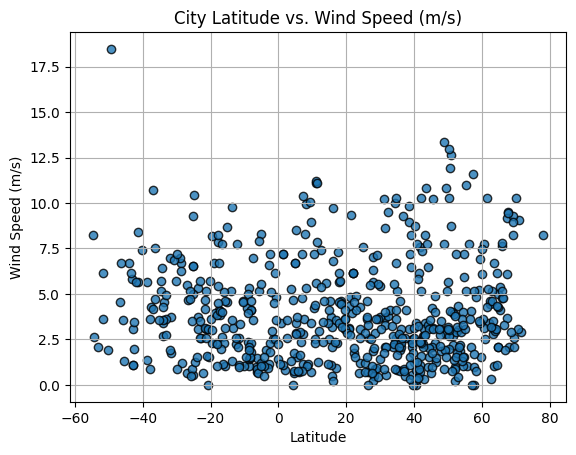

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculating the regression line
    regression_line = slope * x_values + intercept
    line_eq = "y=" + str(round(slope,2)) + "x+"+str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,al muwayh,22.4333,41.7583,20.63,54,59,1.74,SA,1733430885
5,grand falls-windsor,48.9332,-55.6649,-2.50,73,97,0.89,CA,1733430887
6,ilulissat,69.2167,-51.1000,-9.99,62,75,8.23,GL,1733430888
7,constantia,44.1833,28.6500,2.38,83,100,6.48,RO,1733430889
9,hamilton,39.1834,-84.5333,-3.09,54,0,8.23,US,1733430891


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,23.15,85,78,4.55,AO,1733430882
1,waitangi,-43.9535,-176.5597,12.12,93,100,6.71,NZ,1733430883
2,grytviken,-54.2811,-36.5092,0.46,76,100,2.62,GS,1733430884
4,mount gambier,-37.8333,140.7667,17.42,77,100,0.89,AU,1733430836
8,puerto natales,-51.7236,-72.4875,10.25,43,75,6.17,CL,1733430890


###  Temperature vs. Latitude Linear Regression Plot

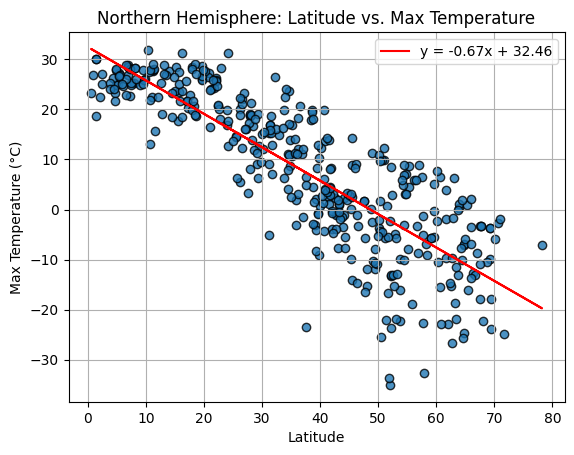

R-squared for Northern Hemisphere: 0.709


In [15]:
# Linear regression on Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_north, y_values_north)
regression_line = slope * x_values_north + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values_north, y_values_north, edgecolor="black", alpha=0.8)
plt.plot(x_values_north, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared value
print(f"R-squared for Northern Hemisphere: {r_value**2:.3f}")

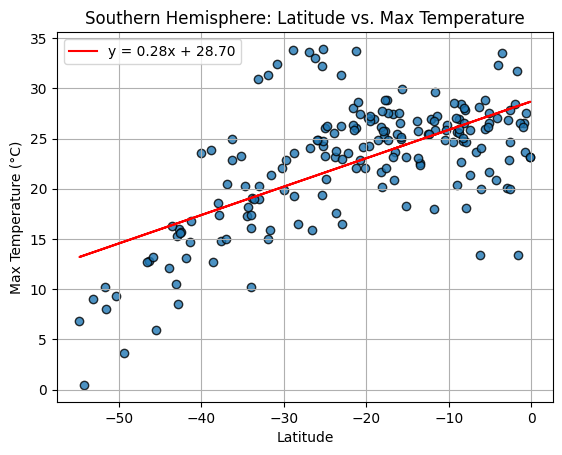

R-squared for Southern Hemisphere: 0.399


In [16]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_south, y_values_south)
regression_line = slope * x_values_south + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values_south, y_values_south, edgecolor="black", alpha=0.8)
plt.plot(x_values_south, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Southern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared value
print(f"R-squared for Southern Hemisphere: {r_value**2:.3f}")

**Discussion about the linear relationship:** 

Northern Hemisphere:  R-squared = 0.709 : 
Suggests latitude strongly affects temperature, as expected (closer to the equator, it’s warmer).
Southern Hemisphere:  R-squared = 0.399 : 
A weaker but still notable relationship, probably there are more factors thats have influence to the temperature as ocean areas,  altitude, terrain, and local weather systems

### Humidity vs. Latitude Linear Regression Plot

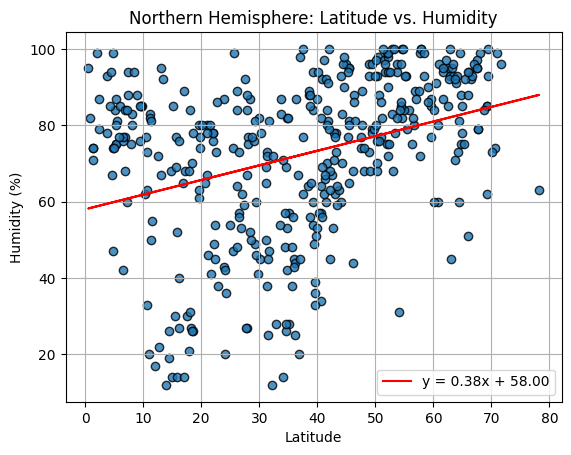

R-squared for Northern Hemisphere: 0.117


In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Latitude vs. Humidity
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_north, y_values_north)
regression_line = slope * x_values_north + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values_north, y_values_north, edgecolor="black", alpha=0.8)
plt.plot(x_values_north, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared value
print(f"R-squared for Northern Hemisphere: {r_value**2:.3f}")

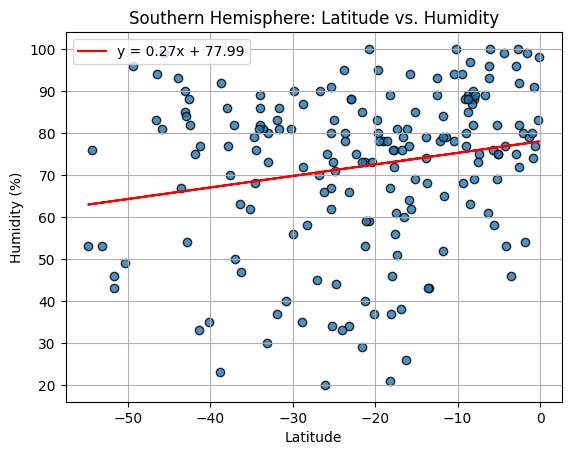

R-squared for Southern Hemisphere: 0.040


In [18]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Latitude vs. Humidity
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_south, y_values_south)
regression_line = slope * x_values_south + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values_south, y_values_south, edgecolor="black", alpha=0.8)
plt.plot(x_values_south, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared value
print(f"R-squared for Southern Hemisphere: {r_value**2:.3f}")

**Discussion about the linear relationship:** 
Very weak correlation between latitude and humidity in both hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

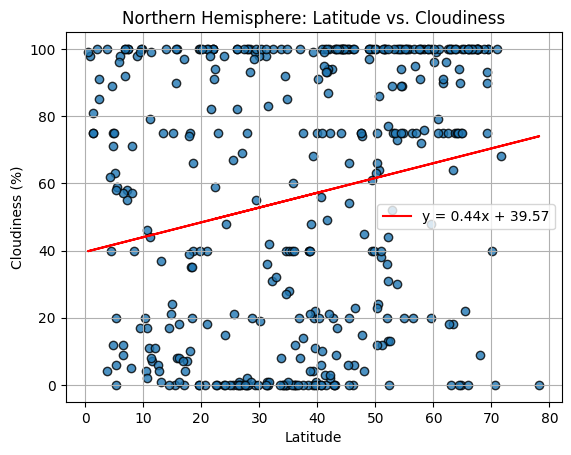

R-squared for Northern Hemisphere: 0.043


In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Latitude vs. Cloudiness
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_north, y_values_north)
regression_line = slope * x_values_north + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values_north, y_values_north, edgecolor="black", alpha=0.8)
plt.plot(x_values_north, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared value
print(f"R-squared for Northern Hemisphere: {r_value**2:.3f}")

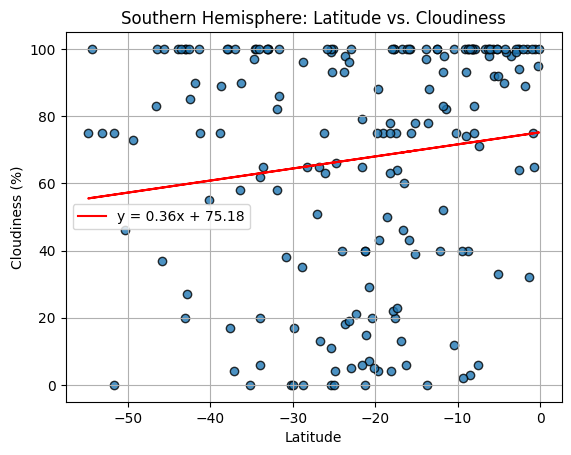

R-squared for Southern Hemisphere: 0.019


In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Latitude vs. Cloudiness
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_south, y_values_south)
regression_line = slope * x_values_south + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values_south, y_values_south, edgecolor="black", alpha=0.8)
plt.plot(x_values_south, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared value
print(f"R-squared for Southern Hemisphere: {r_value**2:.3f}")

**Discussion about the linear relationship:** 

 Latitude has very little influence on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

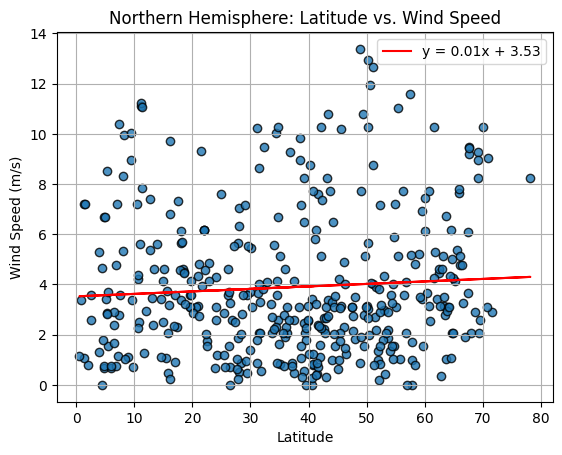

R-squared for Northern Hemisphere: 0.004


In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Latitude vs. Wind Speed
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_north, y_values_north)
regression_line = slope * x_values_north + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values_north, y_values_north, edgecolor="black", alpha=0.8)
plt.plot(x_values_north, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared value
print(f"R-squared for Northern Hemisphere: {r_value**2:.3f}")

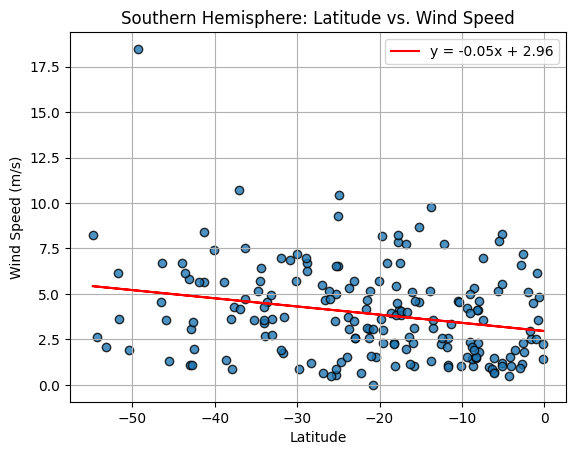

R-squared for Southern Hemisphere: 0.059


In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Latitude vs. Wind Speed
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_south, y_values_south)
regression_line = slope * x_values_south + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values_south, y_values_south, edgecolor="black", alpha=0.8)
plt.plot(x_values_south, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared value
print(f"R-squared for Southern Hemisphere: {r_value**2:.3f}")

**Discussion about the linear relationship:** 

Extremely weak relationship between latitude and winds, suggesting that latitude has almost no meaningful influence on wind speed in the Northern and Southern Hemisphere. Probably, other meteorological and geographic factors, such as pressure gradients, ocean currents, and local weather systems, play a much larger role.